In [1]:
%%time

!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 11.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=4aae6bbf711132ec7faccad05edc79999f506a3345dba1a53bd0d03c843d6ec5
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
CPU times: user 207 ms, sys: 50.7 ms, total: 258 ms
Wall time: 16.1 s


In [2]:
%%time

!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.3 MB/s eta 0:00:00
CPU times: user 163 ms, sys: 38.9 ms, total: 202 ms
Wall time: 13.1 s


In [3]:
%%time

!pip install num2words

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 3.7 MB/s eta 0:00:00a 0:00:01
CPU times: user 149 ms, sys: 47.9 ms, total: 197 ms
Wall time: 12.9 s


In [4]:
%%time

import warnings
warnings.filterwarnings('ignore')

CPU times: user 51 µs, sys: 14 µs, total: 65 µs
Wall time: 74.1 µs


In [5]:
%%time

# Basic imports:
import numpy as np
import pandas as pd
import matplotlib
import scipy
import re
from datasets import load_dataset, Dataset

# NLTK, num2words, lemmatizer, stemmer, autocorrect imports:
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller

# ML imports:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import torch
from torch.nn import CrossEntropyLoss
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# DL imports:
from transformers import AutoTokenizer, TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification
from torch.utils.data import DataLoader
import evaluate
from transformers import (
    AutoTokenizer, 
    AutoModelForSequenceClassification, 
    Trainer, 
    TrainingArguments, 
    DataCollatorWithPadding
)

CPU times: user 13.3 s, sys: 1.94 s, total: 15.3 s
Wall time: 22.9 s


In [6]:
%%time

# Download necessary resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/w

In [7]:
%%time

import pandas as pd

train = pd.read_csv('/kaggle/input/unzip-file/train.csv', encoding='ISO-8859-1')
test = pd.read_csv('/kaggle/input/unzip-file/test.csv', encoding='ISO-8859-1')
sample_submission = pd.read_csv('/kaggle/input/unzip-file/sample_submission.csv', encoding='ISO-8859-1')

CPU times: user 405 ms, sys: 62.7 ms, total: 468 ms
Wall time: 672 ms


In [8]:
%%time

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74067 entries, 0 to 74066
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             74067 non-null  int64  
 1   product_uid    74067 non-null  int64  
 2   product_title  74067 non-null  object 
 3   search_term    74067 non-null  object 
 4   relevance      74067 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB
CPU times: user 24.6 ms, sys: 5.79 ms, total: 30.4 ms
Wall time: 43.8 ms


In [9]:
%%time

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166693 entries, 0 to 166692
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             166693 non-null  int64 
 1   product_uid    166693 non-null  int64 
 2   product_title  166693 non-null  object
 3   search_term    166693 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.1+ MB
CPU times: user 42.1 ms, sys: 0 ns, total: 42.1 ms
Wall time: 40.5 ms


In [10]:
%%time

def clean_encoding_issues(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Only apply to string columns
            df[col] = df[col].apply(lambda x: x.encode('ISO-8859-1', 'ignore').decode('ISO-8859-1', 'ignore') if isinstance(x, str) else x)
    return df

train = clean_encoding_issues(train)
test = clean_encoding_issues(test)

CPU times: user 416 ms, sys: 26.9 ms, total: 443 ms
Wall time: 442 ms


In [11]:
%%time

# Applying lowercasing 
def apply_lower_case(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Only apply to string columns
            df[col] = df[col].str.lower()
    return df

train = apply_lower_case(train)
test = apply_lower_case(test)

CPU times: user 132 ms, sys: 22.1 ms, total: 154 ms
Wall time: 152 ms


In [12]:
%%time

# Set of stopwords in English
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a specific dataframe
def remove_stopwords(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Only apply to string columns
            df[col] = df[col].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    return df

# Remove stopwords
train = remove_stopwords(train)
test = remove_stopwords(test)

CPU times: user 1.26 s, sys: 14.5 ms, total: 1.28 s
Wall time: 1.28 s


In [13]:
%%time

from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
ps = PorterStemmer()

# Function to apply stemming to a specific dataframe
def apply_stemming(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Only apply to string columns
            df[col] = df[col].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
    return df

# Apply stemming
train = apply_stemming(train)
test = apply_stemming(test)

CPU times: user 1min 45s, sys: 12.6 ms, total: 1min 45s
Wall time: 1min 45s


In [14]:
%%time

from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization 
def apply_lemmatization(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Only apply to string columns
            df[col] = df[col].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    return df

# Apply lemmatization 
train = apply_lemmatization(train)
test = apply_lemmatization(test)

CPU times: user 22.2 s, sys: 146 ms, total: 22.3 s
Wall time: 22.3 s


In [15]:
%%time

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Function to encode categorical columns in a dataframe
def encode_categorical_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Only apply to string columns
            df[col] = le.fit_transform(df[col])
    return df

# Encode categorical columns in both datasets
train = encode_categorical_columns(train)
test = encode_categorical_columns(test)

CPU times: user 673 ms, sys: 6.94 ms, total: 680 ms
Wall time: 679 ms


In [16]:
%%time

# Define the text columns to be vectorized
text_columns = ['product_title', 'search_term']

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [17]:
%%time

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to top 1000 features for simplicity

CPU times: user 45 µs, sys: 1 µs, total: 46 µs
Wall time: 49.8 µs


In [18]:
%%time

train['product_title'] = train['product_title'].astype(str)
train['search_term'] = train['search_term'].astype(str)

CPU times: user 69.8 ms, sys: 975 µs, total: 70.7 ms
Wall time: 70.3 ms


In [19]:
%%time

# Apply TF-IDF transformation on the text columns
tfidf_product_title = tfidf_vectorizer.fit_transform(train['product_title']).toarray()
tfidf_search_term = tfidf_vectorizer.fit_transform(train['search_term']).toarray()

CPU times: user 950 ms, sys: 70 ms, total: 1.02 s
Wall time: 1.03 s


In [20]:
%%time

# Combine the TF-IDF features into a single feature set
X_text_features = np.hstack((tfidf_product_title, tfidf_search_term))

CPU times: user 235 ms, sys: 440 ms, total: 675 ms
Wall time: 673 ms


In [21]:
%%time

# Define the target variable `y` as 'relevance'
y = train['relevance']

CPU times: user 140 µs, sys: 3 µs, total: 143 µs
Wall time: 155 µs


In [22]:
%%time

# Split the data into training and validation sets
X_train_text, X_val_text, y_train_text, y_val_text = train_test_split(X_text_features, y, test_size=0.2, random_state=42)

CPU times: user 145 ms, sys: 219 ms, total: 364 ms
Wall time: 365 ms


In [23]:
%%time

# Define a simple neural network model
model_text = Sequential()
model_text.add(Dense(128, input_dim=X_train_text.shape[1], activation='relu'))
model_text.add(Dense(64, activation='relu'))
model_text.add(Dense(1))  # Output layer with a single neuron for regression

# Compile the model
model_text.compile(optimizer='adam', loss='mean_squared_error')

CPU times: user 233 ms, sys: 456 ms, total: 689 ms
Wall time: 788 ms


In [24]:
%%time

from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

CPU times: user 116 µs, sys: 2.98 ms, total: 3.09 ms
Wall time: 3.12 ms


In [25]:
%%time

# Train the model with early stopping
model_text.fit(X_train_text, y_train_text, epochs=10, batch_size=32, validation_data=(X_val_text, y_val_text), 
               callbacks=[early_stopping], verbose=1)

Epoch 1/10


I0000 00:00:1727748257.067811     126 service.cc:145] XLA service 0x7b7924005000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727748257.067865     126 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727748257.067869     126 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 102/1852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9704

I0000 00:00:1727748258.261335     126 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1852/1852 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.7803 - val_loss: 0.2806
Epoch 2/10
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2726 - val_loss: 0.2785
Epoch 3/10
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2743 - val_loss: 0.2824
Epoch 4/10
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2685 - val_loss: 0.2734
Epoch 5/10
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2669 - val_loss: 0.2750
Epoch 6/10
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2665 - val_loss: 0.2784
Epoch 7/10
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2655 - val_loss: 0.2729
Epoch 8/10
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2636 - val_loss: 0.2735
Epoch 9/10
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2634 - val_loss: 0.2736
Epoch 10/10
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2633 - val_loss: 0.2754
CPU times: user 46.5 s, sys: 6.85 s, total: 53.3 s
Wall time: 38.1 s


Epoch 1/10
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2626 - val_loss: 0.2734
Epoch 2/10
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2612 - val_loss: 0.2730
Epoch 3/10
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2633 - val_loss: 0.2746


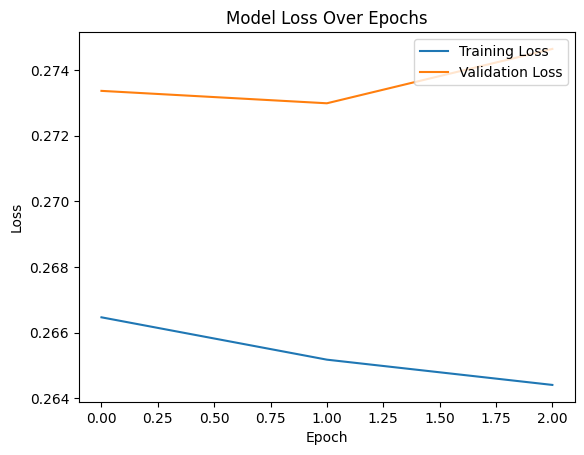

CPU times: user 14.3 s, sys: 2.81 s, total: 17.1 s
Wall time: 11.9 s


In [26]:
%%time

import matplotlib.pyplot as plt

# Train the model and capture the history
history = model_text.fit(X_train_text, y_train_text, epochs=10, batch_size=32, 
                         validation_data=(X_val_text, y_val_text), 
                         callbacks=[early_stopping], verbose=1)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [27]:
%%time

# Predict on validation set
y_pred_text = model_text.predict(X_val_text)

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
CPU times: user 1.35 s, sys: 267 ms, total: 1.62 s
Wall time: 1.47 s


In [28]:
%%time

# Calculate RMSE for the text-based features
rmse_text = np.sqrt(mean_squared_error(y_val_text, y_pred_text))
print(f"RMSE: {rmse_text}")

RMSE: 0.5228457787802141
CPU times: user 1.96 ms, sys: 1.01 ms, total: 2.96 ms
Wall time: 2.12 ms
